In [1]:
from __future__ import print_function
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import librosa
import librosa.display
import os

# import seaborn
import scipy, sklearn
import IPython.display

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 5)

In [2]:
filename_choir = 'choir.mp3'
    

In [3]:
x_choir, fs_choir = librosa.load(filename_choir, duration=24)


In [4]:
IPython.display.Audio(x_choir, rate=fs_choir)

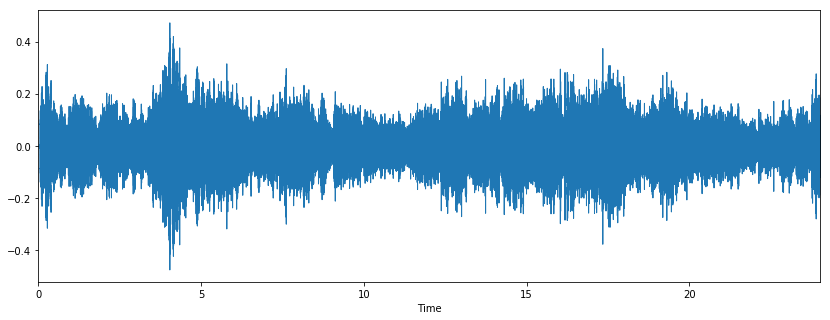

In [5]:
librosa.display.waveplot(x_choir, fs_choir)

In [6]:
S_choir = librosa.feature.melspectrogram(x_choir, fs_choir)

In [7]:
S_log_choir = librosa.logamplitude(S_choir)

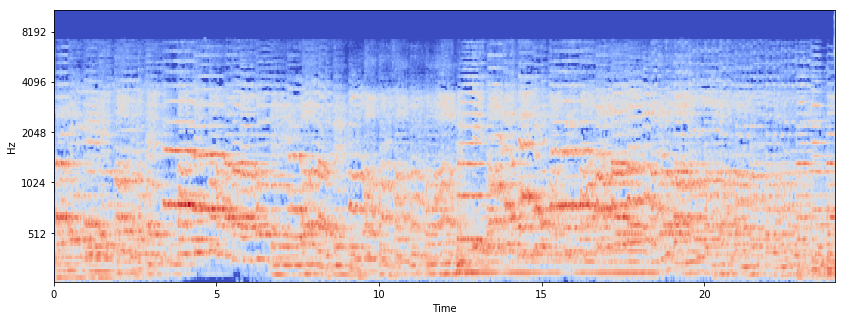

In [8]:
librosa.display.specshow(S_log_choir, sr=fs_choir, x_axis='time', y_axis='mel')

In [9]:
n_mfcc = 12
mfcc_choir = librosa.feature.mfcc(x_choir, sr=fs_choir, n_mfcc=n_mfcc).T

In [10]:
mfcc_choir.shape

(1034, 12)

In [11]:
scaler = sklearn.preprocessing.StandardScaler()

In [12]:
mfcc_choir_scaled = scaler.fit_transform(mfcc_choir)


In [13]:
mfcc_choir_scaled.mean(axis=0)

array([  4.94768636e-16,  -6.18460795e-16,   1.92410025e-16,
         5.49742929e-17,   2.74871465e-17,   2.33640745e-16,
         5.49742929e-17,   5.49742929e-17,   1.64922879e-16,
         2.74871465e-17,  -1.03076799e-17,   0.00000000e+00])

In [14]:
mfcc_choir_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [15]:
filename_clavier = 'clavier.mp3'

In [16]:
x_clavier, fs_clavier = librosa.load(filename_clavier, duration=24)

In [17]:
IPython.display.Audio(x_clavier, rate=fs_clavier)

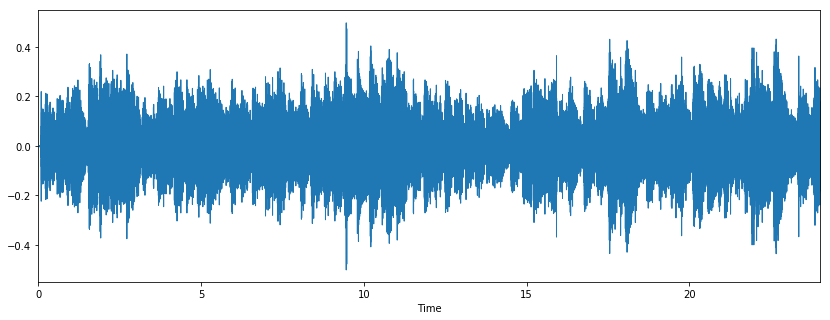

In [18]:
librosa.display.waveplot(x_clavier, fs_clavier)

In [19]:
S_clavier = librosa.feature.melspectrogram(x_clavier, fs_clavier)

In [20]:
S_log_clavier = librosa.logamplitude(S_clavier)

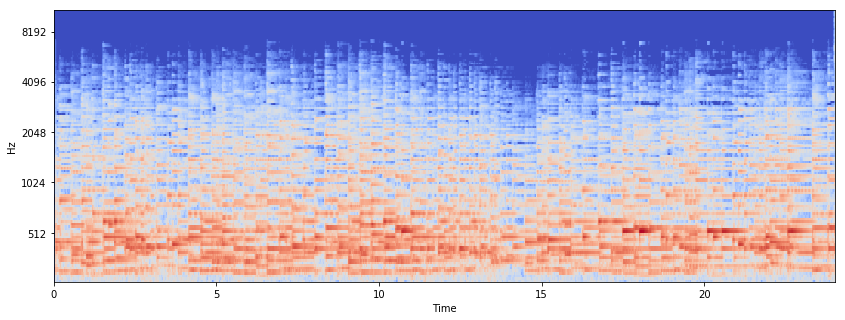

In [21]:
librosa.display.specshow(S_log_clavier, sr=fs_clavier, x_axis='time', y_axis='mel')

In [22]:
mfcc_clavier = librosa.feature.mfcc(x_clavier, sr=fs_clavier, n_mfcc=n_mfcc).T

In [23]:
mfcc_clavier.shape

(1034, 12)

In [24]:
mfcc_clavier_scaled = scaler.transform(mfcc_clavier)

In [25]:
mfcc_clavier_scaled.mean(axis=0)

array([-0.42261991,  2.3798083 ,  0.49202402, -0.53366804,  1.82877284,
        0.01307605, -0.73944215, -1.63801601,  0.97821404, -0.67801341,
       -1.82460775,  0.53231395])

In [26]:
mfcc_clavier_scaled.std(axis=0)

array([ 1.28830699,  0.96680166,  0.91156704,  0.70235409,  0.47352988,
        0.71611908,  0.56139629,  0.62513972,  0.5310753 ,  0.67403564,
        0.70045057,  0.54656044])

In [27]:
features = np.vstack((mfcc_choir_scaled, mfcc_clavier_scaled))

In [28]:
features.shape

(2068, 12)

In [29]:
labels = np.concatenate((np.zeros(len(mfcc_choir_scaled)), np.ones(len(mfcc_clavier_scaled))))

In [30]:
num_choir = len(mfcc_choir_scaled)
num_clavier = len(mfcc_clavier_scaled)

In [31]:
label_one_hot_choir = np.stack((np.zeros(num_choir), np.ones(num_choir)), axis = -1)
label_one_hot_clavier = np.stack((np.ones(num_clavier), np.zeros(num_clavier)), axis = -1)

In [32]:
labels_one_hot = np.concatenate((label_one_hot_choir, label_one_hot_clavier))


In [33]:
labels_one_hot

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [34]:
x_choir_test, fs_choir = librosa.load(filename_choir, duration=10, offset=10)

In [35]:
x_clavier_test, fs_clavier = librosa.load(filename_clavier, duration=10, offset=10)

In [36]:
mfcc_choir_test = librosa.feature.mfcc(x_choir_test, sr=fs_choir, n_mfcc=n_mfcc).T

In [37]:
mfcc_clavier_test = librosa.feature.mfcc(x_clavier_test, sr=fs_clavier, n_mfcc=n_mfcc).T

In [38]:
mfcc_choir_test_scaled = scaler.transform(mfcc_choir_test)

In [39]:
mfcc_clavier_test_scaled = scaler.transform(mfcc_clavier_test)

In [40]:
features_test = np.vstack((mfcc_choir_test_scaled, mfcc_clavier_test_scaled))

In [41]:
labels_test = np.concatenate((np.zeros(len(mfcc_choir_test)), np.ones(len(mfcc_clavier_test))))

In [42]:
num_choir_test = len(mfcc_choir_test_scaled)
num_clavier_test = len(mfcc_clavier_test_scaled)

In [43]:
label_one_hot_choir_test = np.stack((np.zeros(num_choir_test), np.ones(num_choir_test)), axis = -1)
label_one_hot_clavier_test = np.stack((np.ones(num_clavier_test), np.zeros(num_clavier_test)), axis = -1)

In [44]:
labels_one_hot_test = np.concatenate((label_one_hot_choir_test, label_one_hot_clavier_test))


In [45]:
import tensorflow as tf

In [46]:
features.shape

(2068, 12)

In [47]:
labels_one_hot.shape

(2068, 2)

In [48]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [49]:
W = tf.Variable(tf.random_uniform([12, 2], -1., 1.))

In [50]:
b = tf.Variable(tf.zeros([2]))

In [51]:
h = tf.add(tf.matmul(X, W), b)

In [52]:
a = tf.nn.relu(h)

In [53]:
nn_model = tf.nn.softmax(a)

In [54]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(nn_model), axis=1))

In [55]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [56]:
train_op = optimizer.minimize(cost)

In [57]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [58]:
for step in range(5000):
    sess.run(train_op, feed_dict={X: features, Y: labels_one_hot})

    if (step + 1) % 10 == 0:
        print('Step: {} | Loss: {}'.format(step + 1, sess.run(cost, feed_dict={X: features, Y: labels_one_hot})))


Step: 10 | Loss: 0.6306411027908325
Step: 20 | Loss: 0.6176531314849854
Step: 30 | Loss: 0.6052060723304749
Step: 40 | Loss: 0.5932661890983582
Step: 50 | Loss: 0.5818764567375183
Step: 60 | Loss: 0.5710262656211853
Step: 70 | Loss: 0.5606033802032471
Step: 80 | Loss: 0.5505812168121338
Step: 90 | Loss: 0.5409330725669861
Step: 100 | Loss: 0.5316534042358398
Step: 110 | Loss: 0.5227044820785522
Step: 120 | Loss: 0.51401287317276
Step: 130 | Loss: 0.5055840015411377
Step: 140 | Loss: 0.4973950684070587
Step: 150 | Loss: 0.4894573390483856
Step: 160 | Loss: 0.48183172941207886
Step: 170 | Loss: 0.47446590662002563
Step: 180 | Loss: 0.4673289358615875
Step: 190 | Loss: 0.4603893756866455
Step: 200 | Loss: 0.45367419719696045
Step: 210 | Loss: 0.4471915364265442
Step: 220 | Loss: 0.44098252058029175
Step: 230 | Loss: 0.4349660575389862
Step: 240 | Loss: 0.42917537689208984
Step: 250 | Loss: 0.4235679507255554
Step: 260 | Loss: 0.41817566752433777
Step: 270 | Loss: 0.41303229331970215
Step:

In [59]:
prediction = tf.argmax(nn_model, 1)
target = tf.argmax(Y, 1)
print('<Predicted output>\n', sess.run(prediction, feed_dict={X: features_test}))
# print('<True label>\n', sess.run(target, feed_dict={Y: labels_one_hot_test}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Test Accuracy: %.2f' % sess.run(accuracy * 100, feed_dict={X: features_test, Y: labels_one_hot_test}))

<Predicted output>
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 